# **Лабораторная работа 4**

# **Загрузка данных**

In [120]:
import pandas as pd

# Загрузка данных
df = pd.read_csv('Rotten Tomatoes Movies.csv')

# **Подготовка данных**

In [121]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
 16  audi

In [122]:
# Удаление пропущенных значений
df = df.dropna()

# Удаление дубликатов
df = df.drop_duplicates()

# Удаление ненужных для анализа столбцов
df = df.drop(columns=['movie_info', 'critics_consensus', 'cast', 'tomatometer_count'])

In [123]:
# Основная информация о данных
display(df.head())
display(df.describe())

,movie_title,rating,genre,directors,writers,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,53.0,254287.0
1,Please Give,R,Comedy,Nicole Holofcener,Nicole Holofcener,2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,64.0,11567.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",Sidney Lumet,Reginald Rose,1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,1954-01-01,2003-05-20,127.0,Disney,Fresh,89,74.0,68860.0
5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,"Roland Emmerich, Harald Kloser",2008-03-07,2008-06-24,109.0,Warner Bros. Pictures,Rotten,8,37.0,411087.0


,runtime_in_minutes,tomatometer_rating,audience_rating,audience_count
count,7610.000000,7610.000000,7610.000000,7.610000e+03
mean,106.319974,61.312352,62.987385,3.197788e+05
std,19.560031,27.638312,19.546161,2.657350e+06
min,1.000000,0.000000,6.000000,5.000000e+00
25%,94.000000,39.000000,48.000000,6.042000e+03
50%,103.000000,67.000000,65.000000,2.523550e+04
75%,116.000000,86.000000,79.000000,9.480075e+04
max,333.000000,100.000000,100.000000,3.579764e+07


In [124]:
# Проверка на пропущенные значения
df.isna().sum()

movie_title           0
rating                0
genre                 0
directors             0
writers               0
in_theaters_date      0
on_streaming_date     0
runtime_in_minutes    0
studio_name           0
tomatometer_status    0
tomatometer_rating    0
audience_rating       0
audience_count        0
dtype: int64

In [125]:
# Преобразование столбца on_streaming_date в datetime
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'], errors='coerce')

# Извлечение года из on_streaming_date
df['release_year'] = df['on_streaming_date'].dt.year


df[['on_streaming_date', 'release_year']].head()

,on_streaming_date,release_year
0,2010-06-29,2010
1,2010-10-19,2010
3,2001-03-06,2001
4,2003-05-20,2003
5,2008-06-24,2008


# **Дополнительный анализ**

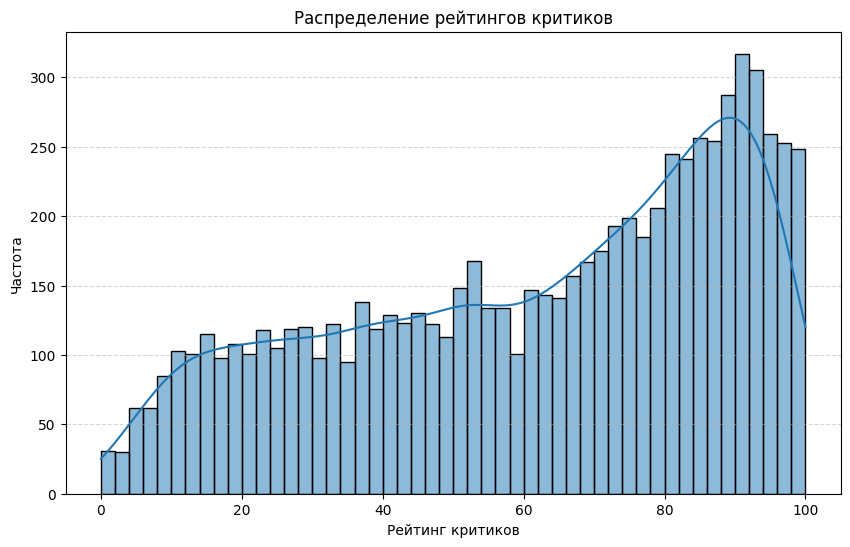

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

# Распределение рейтингов критиков
plt.figure(figsize=[10, 6])
sns.histplot(df['tomatometer_rating'], bins=50, kde=True)
plt.title('Распределение рейтингов критиков')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

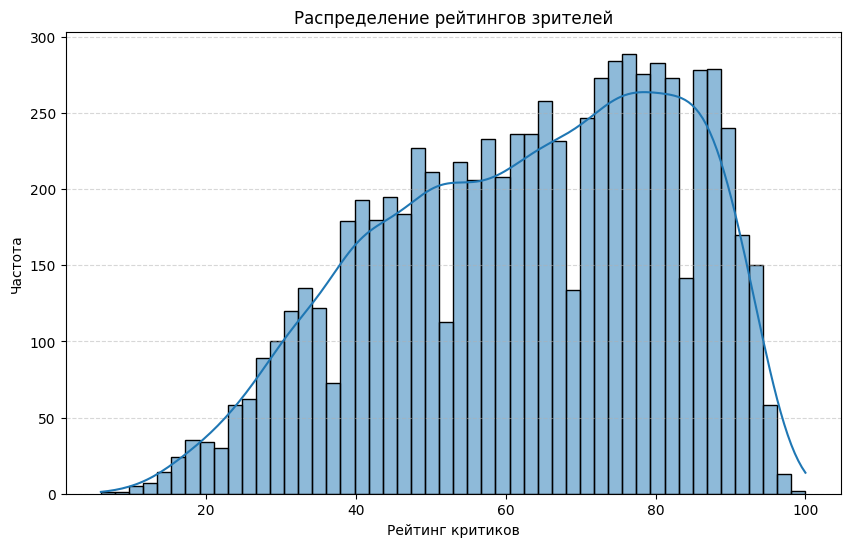

In [127]:
# Распределение рейтингов аудитории
plt.figure(figsize=[10, 6])
sns.histplot(df['audience_rating'], bins=50, kde=True)
plt.title('Распределение рейтингов зрителей')
plt.xlabel('Рейтинг критиков')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

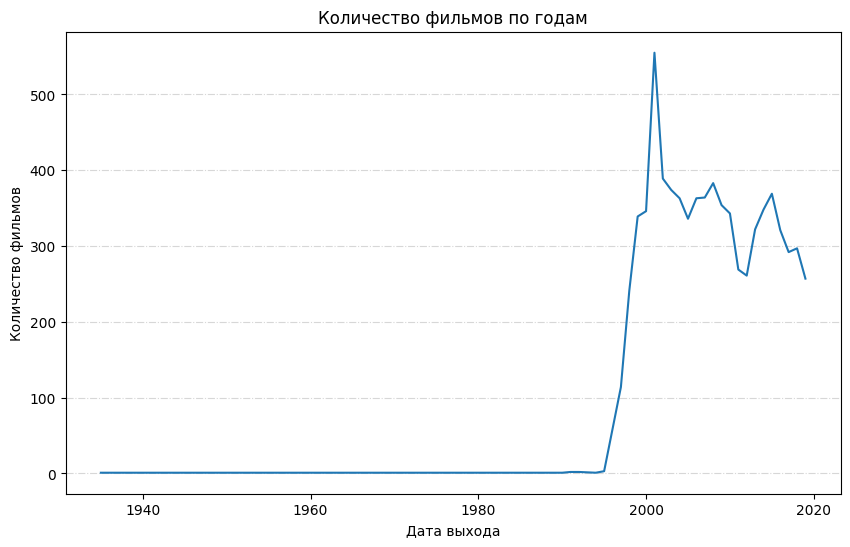

In [128]:
plt.figure(figsize=[10, 6])
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Количество фильмов по годам')
plt.xlabel('Дата выхода')
plt.ylabel('Количество фильмов')
plt.grid(axis='y', linestyle='-.', alpha=0.5)
plt.show()

In [ ]:
print("Mean:", df['release_year'].mean())
print("Median:", df['release_year'].median())
print("Skewness:", df['release_year'].skew())
print("Kurtosis:", df['release_year'].kurtosis())

Mean: 2007.8466491458607
Median: 2008.0
Skewness: -0.08624098516498878
Kurtosis: 1.0375471489900927


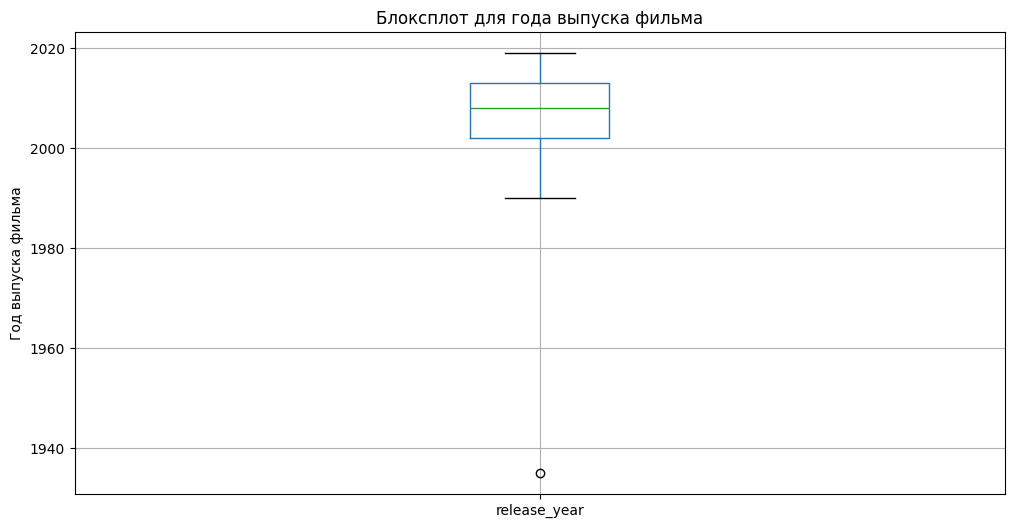

In [131]:
# Построение boxplot
plt.figure(figsize=(12, 6))
df.boxplot(column='release_year')
plt.title('Блоксплот для года выпуска фильма')
plt.ylabel('Год выпуска фильма')
plt.show()

In [132]:
data = df.copy()

data = data[data['release_year'] > 1940]

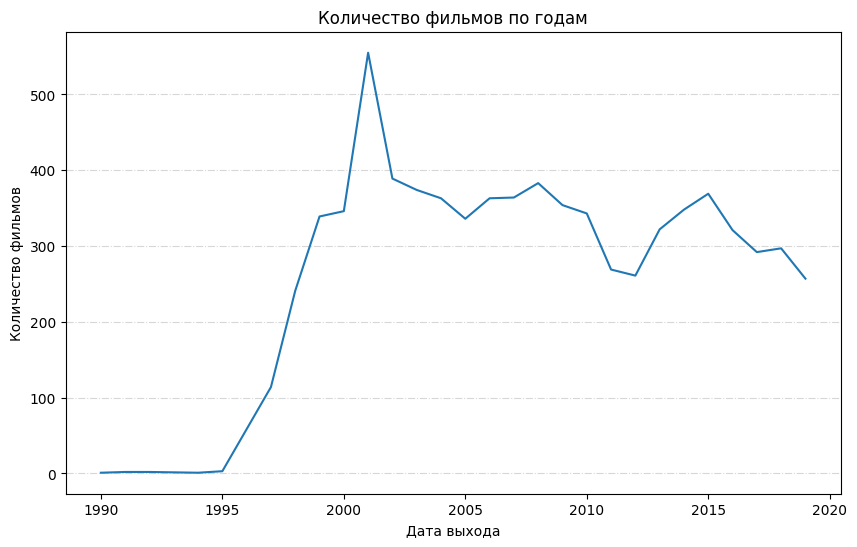

In [134]:
plt.figure(figsize=[10, 6])
data['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Количество фильмов по годам')
plt.xlabel('Дата выхода')
plt.ylabel('Количество фильмов')
plt.grid(axis='y', linestyle='-.', alpha=0.5)
plt.show()

# **Проверка гипотезы**

**Гипотеза:** Фильмы, выпущенные в последние годы, имеют более высокие средние рейтинги зрителей, чем фильмы, выпущенные раньше.\
\
**Обоснование гипотезы:** cовременные фильмы чаще используют передовые технологии, популярные актеры и маркетинговые кампании, что может положительно влиять на восприятие зрителей.\
В старых фильмах могут преобладать устаревшие техники и менее актуальные сюжеты, что может снижать их привлекательность для современных зрителей.

In [136]:
# Вычисление среднего рейтинга зрителей по годам
yearly_ratings = data.groupby('release_year')['audience_rating'].mean()

display(yearly_ratings)

release_year
1990    92.000000
1991    84.500000
1992    28.500000
1994    70.000000
1995    69.333333
1997    73.307018
1998    70.170124
1999    70.144543
2000    68.306358
2001    65.063063
2002    65.156812
2003    65.211230
2004    65.264463
2005    65.369048
2006    64.046832
2007    65.302198
2008    61.430809
2009    58.206215
2010    59.206997
2011    60.104089
2012    58.869732
2013    58.288820
2014    58.988506
2015    56.227642
2016    59.311526
2017    60.739726
2018    61.195286
2019    64.136187
Name: audience_rating, dtype: float64

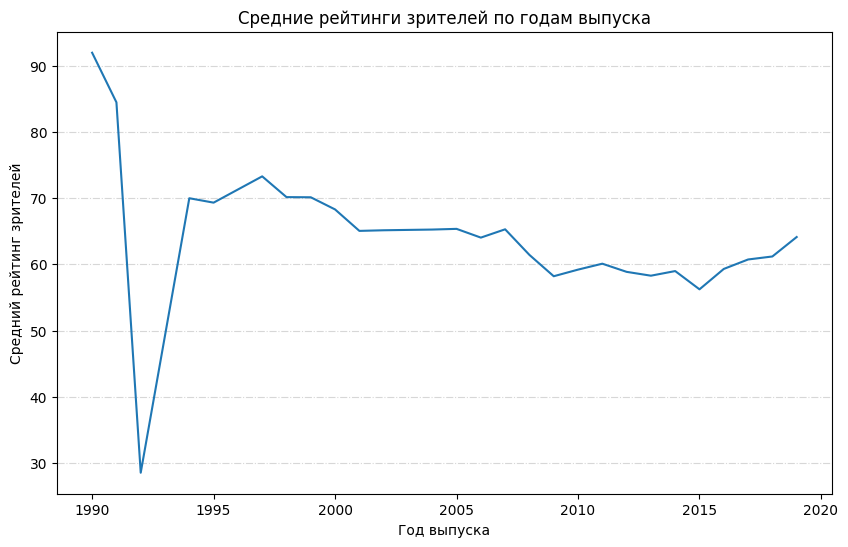

In [138]:
# Линейный график
plt.figure(figsize=[10, 6])
plt.plot(yearly_ratings.index, yearly_ratings.values)
plt.title('Средние рейтинги зрителей по годам выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Средний рейтинг зрителей')
plt.grid(axis='y', linestyle='-.', alpha=0.5)
plt.show()

In [139]:
# Разделение на категории по десятилетиям
bins = [1900, 2000, 2010, 2020, 2030]
labels = ['До 2000', '2000-2010', '2010-2020', '2020+']
data['decade'] = pd.cut(data['release_year'], bins=bins, labels=labels)

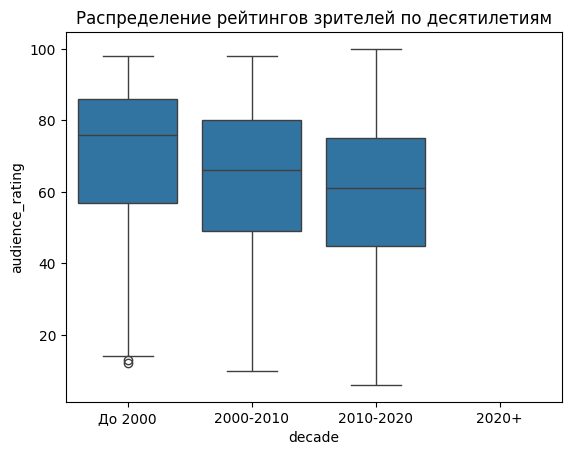

In [140]:
# Boxplot для сравнения рейтингов зрителей
sns.boxplot(x='decade', y='audience_rating', data=data)
plt.title('Распределение рейтингов зрителей по десятилетиям')
plt.show()

Гипотеза о том, что фильмы, выпущенные в последние годы, имеют более высокие средние рейтинги зрителей, была опровергнута. На основании анализа данных, фильмы, выпущенные в более ранние годы, демонстрируют более высокие рейтинги зрителей, чем фильмы, выпущенные в последние годы. Это может свидетельствовать о снижении качества фильмов, выпущенных в последнее время.